<a href="https://colab.research.google.com/github/Karthikv44/Karthikv44/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas
import os

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [120]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [121]:

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)


In [140]:
dataset


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [123]:
dataset = dataset.dropna()

# convert categorical 'Origin' data into one-hot data
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [124]:
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [125]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()


(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [126]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')


In [127]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()


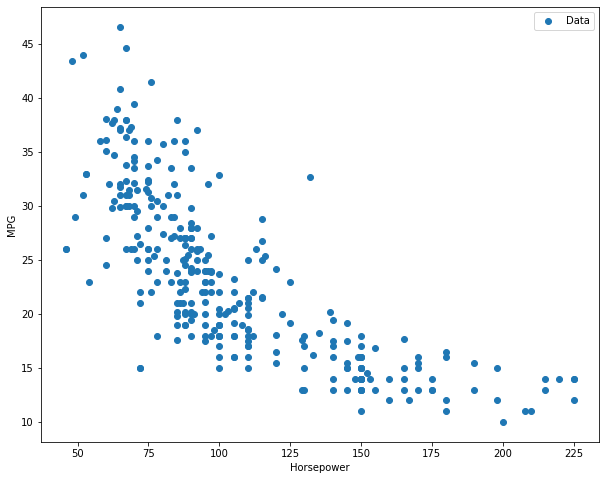

In [128]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()
plot('Horsepower')


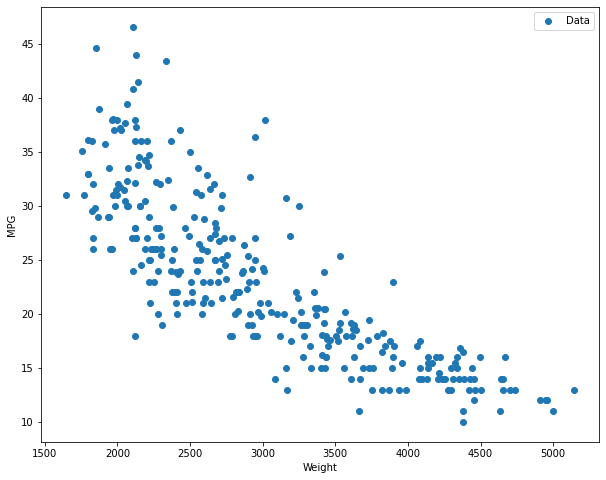

In [129]:
plot('Weight')


In [130]:
# Normalize
print(train_dataset.describe().transpose()[['mean', 'std']])

# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
     0.197]]


In [131]:

# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())


First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [142]:
# Regression
 # 1. Normalize the input horsepower
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense

feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
single_feature_normalizer = layers.Normalization(input_shape=[1,], axis=None)
single_feature_normalizer.adapt(single_feature)





(314,) (314, 9)


In [143]:
# Sequential model
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1) # Linear Model
])

In [144]:
single_feature_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_32 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [145]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError
optim = keras.optimizers.Adam(lr=0.1)

single_feature_model.compile(optimizer=optim, loss=loss)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [146]:
history = single_feature_model.fit(
    train_features[feature], train_labels,
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 51ms/step - loss: 22.8649 - val_loss: 22.9340
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 22.0642 - val_loss: 22.1343
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 21.2615 - val_loss: 21.3342
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 20.4644 - val_loss: 20.5343
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 19.6617 - val_loss: 19.7343
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 18.8625 - val_loss: 18.9342
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 18.0621 - val_loss: 18.1341
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 17.2627 - val_loss: 17.3342
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 16.4626 - val_loss: 16.5343
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.6623 - val_loss: 15.7343
Epoch 

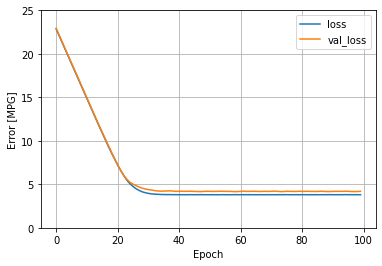

In [147]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)


In [148]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 3.6440


3.6439757347106934

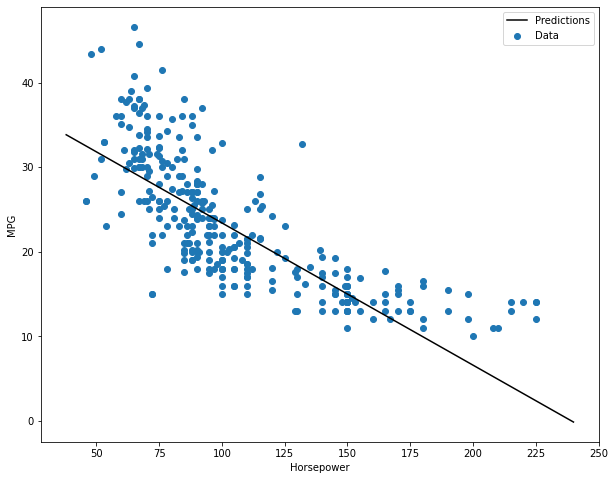

In [149]:
# predict and plot
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)
    
plot(feature, x,y)


In [150]:
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [152]:
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_32 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [153]:
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)


Epoch 1/100
8/8 [==============================] - 1s 19ms/step - loss: 23.0457 - val_loss: 23.4345
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 22.8338 - val_loss: 23.2043
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 22.6053 - val_loss: 22.9345
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 22.3244 - val_loss: 22.5925
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 21.9508 - val_loss: 22.1424
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 21.4557 - val_loss: 21.5383
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 20.8039 - val_loss: 20.7517
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 19.9734 - val_loss: 19.7611
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 18.9326 - val_loss: 18.6178
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 17.8175 - val_loss: 17.3708
Epoch 11

In [154]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)


3/3 [==============================] - 0s 3ms/step - loss: 2.9359


2.935913562774658

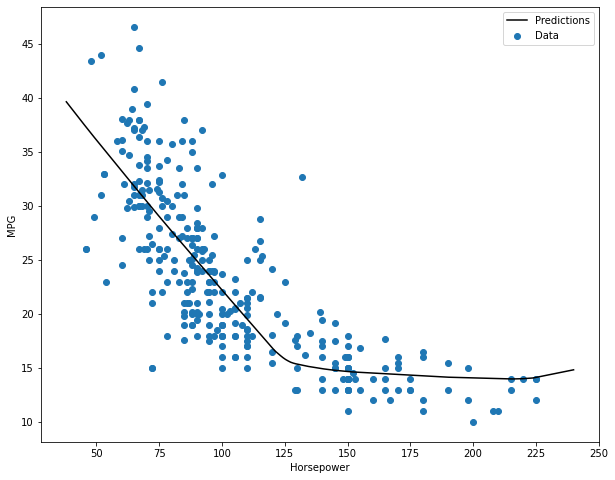

In [155]:
# predict and plot
x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x)

plot(feature, x,y)


In [156]:
# multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

In [157]:
linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 22.8491 - val_loss: 23.2080
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 21.9949 - val_loss: 22.5137
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.1747 - val_loss: 21.7732
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.3926 - val_loss: 21.1017
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 19.5538 - val_loss: 20.3510
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 18.7155 - val_loss: 19.6332
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 17.8980 - val_loss: 18.9410
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 17.0741 - val_loss: 18.2010
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 16.2443 - val_loss: 17.4820
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.4295 - val_loss: 16.7549
Epoch 1

In [158]:
linear_model.evaluate(
    test_features, test_labels, verbose=1)


3/3 [==============================] - 0s 6ms/step - loss: 2.4711


2.471144914627075